In [1]:
import os
import pandas as pd 

In [2]:
df = pd.read_csv('Berlin-incidents.csv', on_bad_lines='skip')

In [3]:
df.head()

,lat,lon,ts,bike,childCheckBox,trailerCheckBox,pLoc,incident,i1,i2,...,i4,i5,i6,i7,i8,i9,scary,desc,i10,region
0,52.532325,13.394867,1572971392862,1.0,0,0,5.0,1,0,0,...,0,0,0,1,0,0,0,NaN,0,Berlin
1,52.583117,13.428656,1574096883339,1.0,0,0,1.0,4,0,0,...,0,0,0,1,0,0,0,NaN,0,Berlin
2,52.532983,13.329724,1574094864375,1.0,0,0,1.0,3,0,0,...,0,0,0,1,0,0,0,NaN,0,Berlin
3,52.554064,13.383081,1574095749659,1.0,0,0,1.0,2,0,0,...,0,0,0,1,0,0,1,NaN,0,Berlin
4,52.439985,13.245853,1573196026398,7.0,0,0,2.0,1,0,0,...,0,0,0,1,0,0,0,mehrere,0,Berlin


In [4]:

# rename columns 
i_mapping = {
    'i1': 'involve_bus_coach',
    'i2': 'involve_cyclist',
    'i3': 'involve_pedestrian',
    'i4': 'involve_delivery_van',
    'i5': 'involve_lorry_truck',
    'i6': 'involve_motorcyclist',
    'i7': 'involve_car',
    'i8': 'involve_taxi_cab',
    'i9': 'involve_other'
}

df = df.rename(columns=i_mapping)
df.head()

,lat,lon,ts,bike,childCheckBox,trailerCheckBox,pLoc,incident,involve_bus_coach,involve_cyclist,...,involve_delivery_van,involve_lorry_truck,involve_motorcyclist,involve_car,involve_taxi_cab,involve_other,scary,desc,i10,region
0,52.532325,13.394867,1572971392862,1.0,0,0,5.0,1,0,0,...,0,0,0,1,0,0,0,NaN,0,Berlin
1,52.583117,13.428656,1574096883339,1.0,0,0,1.0,4,0,0,...,0,0,0,1,0,0,0,NaN,0,Berlin
2,52.532983,13.329724,1574094864375,1.0,0,0,1.0,3,0,0,...,0,0,0,1,0,0,0,NaN,0,Berlin
3,52.554064,13.383081,1574095749659,1.0,0,0,1.0,2,0,0,...,0,0,0,1,0,0,1,NaN,0,Berlin
4,52.439985,13.245853,1573196026398,7.0,0,0,2.0,1,0,0,...,0,0,0,1,0,0,0,mehrere,0,Berlin


In [5]:
df.columns

Index(['lat', 'lon', 'ts', 'bike', 'childCheckBox', 'trailerCheckBox', 'pLoc',
       'incident', 'involve_bus_coach', 'involve_cyclist',
       'involve_pedestrian', 'involve_delivery_van', 'involve_lorry_truck',
       'involve_motorcyclist', 'involve_car', 'involve_taxi_cab',
       'involve_other', 'scary', 'desc', 'i10', 'region'],
      dtype='object')

In [6]:
""" 
Description of column pLoc:
- 0 = Pocket (default value)
- 1 = Handlebar
- 2 = Jacket pocket
- 3 = Hand
- 4 = Basket/Pannier
- 5 = Backpack/Bag
- 6 = Other
"""
print(df['pLoc'].unique())


[ 5.  1.  2.  4.  0.  6. nan]


In [7]:
# filling missing values with 0 
df['pLoc'] = df['pLoc'].fillna(0)

#  one hot encoding pLoc (place of phone)
df = pd.concat([df, pd.get_dummies(df['pLoc'], prefix='phoneLocation')], axis=1)
df.head()


,lat,lon,ts,bike,childCheckBox,trailerCheckBox,pLoc,incident,involve_bus_coach,involve_cyclist,...,scary,desc,i10,region,phoneLocation_0.0,phoneLocation_1.0,phoneLocation_2.0,phoneLocation_4.0,phoneLocation_5.0,phoneLocation_6.0
0,52.532325,13.394867,1572971392862,1.0,0,0,5.0,1,0,0,...,0,NaN,0,Berlin,False,False,False,False,True,False
1,52.583117,13.428656,1574096883339,1.0,0,0,1.0,4,0,0,...,0,NaN,0,Berlin,False,True,False,False,False,False
2,52.532983,13.329724,1574094864375,1.0,0,0,1.0,3,0,0,...,0,NaN,0,Berlin,False,True,False,False,False,False
3,52.554064,13.383081,1574095749659,1.0,0,0,1.0,2,0,0,...,1,NaN,0,Berlin,False,True,False,False,False,False
4,52.439985,13.245853,1573196026398,7.0,0,0,2.0,1,0,0,...,0,mehrere,0,Berlin,False,False,True,False,False,False


In [8]:
# rename phoneLocation columns 
df = df.rename(columns={
    'phoneLocation_0.0': 'phoneLocation_pocket',
    'phoneLocation_1.0': 'phoneLocation_handlebar',
    'phoneLocation_2.0': 'phoneLocation_jacket_pocket',
    'phoneLocation_3.0': 'phoneLocation_hand',
    'phoneLocation_4.0': 'phoneLocation_basket_pannier',
    'phoneLocation_5.0': 'phoneLocation_backpack_bag',
    'phoneLocation_6.0': 'phoneLocation_other'
})
df.head()


,lat,lon,ts,bike,childCheckBox,trailerCheckBox,pLoc,incident,involve_bus_coach,involve_cyclist,...,scary,desc,i10,region,phoneLocation_pocket,phoneLocation_handlebar,phoneLocation_jacket_pocket,phoneLocation_basket_pannier,phoneLocation_backpack_bag,phoneLocation_other
0,52.532325,13.394867,1572971392862,1.0,0,0,5.0,1,0,0,...,0,NaN,0,Berlin,False,False,False,False,True,False
1,52.583117,13.428656,1574096883339,1.0,0,0,1.0,4,0,0,...,0,NaN,0,Berlin,False,True,False,False,False,False
2,52.532983,13.329724,1574094864375,1.0,0,0,1.0,3,0,0,...,0,NaN,0,Berlin,False,True,False,False,False,False
3,52.554064,13.383081,1574095749659,1.0,0,0,1.0,2,0,0,...,1,NaN,0,Berlin,False,True,False,False,False,False
4,52.439985,13.245853,1573196026398,7.0,0,0,2.0,1,0,0,...,0,mehrere,0,Berlin,False,False,True,False,False,False


In [9]:
df.columns

Index(['lat', 'lon', 'ts', 'bike', 'childCheckBox', 'trailerCheckBox', 'pLoc',
       'incident', 'involve_bus_coach', 'involve_cyclist',
       'involve_pedestrian', 'involve_delivery_van', 'involve_lorry_truck',
       'involve_motorcyclist', 'involve_car', 'involve_taxi_cab',
       'involve_other', 'scary', 'desc', 'i10', 'region',
       'phoneLocation_pocket', 'phoneLocation_handlebar',
       'phoneLocation_jacket_pocket', 'phoneLocation_basket_pannier',
       'phoneLocation_backpack_bag', 'phoneLocation_other'],
      dtype='object')

In [10]:
""" 
Description of column incident:
- -5 = Dummy incident (if no incident is set, this is created to preserve bike, pLoc, childCheckBox and trailerCheckBox info)
- 0 = Nothing (default value)
- 1 = Close Pass
- 2 = Someone pulling in or out
- 3 = Near left or right hook
- 4 = Someone approaching head on
- 5 = Tailgating
- 6 = Near-Dooring
- 7 = Dodging an obstacle (e.g., a dog)
- 8 = Other (Please specify below)
"""
df.incident.unique()



array([1, 4, 3, 2, 5, 8, 7, 6])

In [11]:
# one hot encoding incident 
df = pd.concat([df, pd.get_dummies(df['incident'], prefix='incident')], axis=1)
df.head()

# rename incident columns 
df = df.rename(columns={
    'incident_0': 'incident_nothing',
    'incident_1': 'incident_close_pass',
    'incident_2': 'incident_someone_pulling_in_or_out',
    'incident_3': 'incident_near_left_or_right_hook',
    'incident_4': 'incident_someone_approaching_head_on',
    'incident_5': 'incident_tailgating',
    'incident_6': 'incident_near_dooring',
    'incident_7': 'incident_dodging_an_obstacle',
    'incident_8': 'incident_other'
})
df.head()



,lat,lon,ts,bike,childCheckBox,trailerCheckBox,pLoc,incident,involve_bus_coach,involve_cyclist,...,phoneLocation_backpack_bag,phoneLocation_other,incident_close_pass,incident_someone_pulling_in_or_out,incident_near_left_or_right_hook,incident_someone_approaching_head_on,incident_tailgating,incident_near_dooring,incident_dodging_an_obstacle,incident_other
0,52.532325,13.394867,1572971392862,1.0,0,0,5.0,1,0,0,...,True,False,True,False,False,False,False,False,False,False
1,52.583117,13.428656,1574096883339,1.0,0,0,1.0,4,0,0,...,False,False,False,False,False,True,False,False,False,False
2,52.532983,13.329724,1574094864375,1.0,0,0,1.0,3,0,0,...,False,False,False,False,True,False,False,False,False,False
3,52.554064,13.383081,1574095749659,1.0,0,0,1.0,2,0,0,...,False,False,False,True,False,False,False,False,False,False
4,52.439985,13.245853,1573196026398,7.0,0,0,2.0,1,0,0,...,False,False,True,False,False,False,False,False,False,False


In [12]:
from datetime import datetime
# converting ts to s by dividing 1000
df["ts_in_seconds"] = df["ts"] / 1000

df["ts_date"] = df["ts_in_seconds"].apply(lambda x: datetime.utcfromtimestamp(x))
df.head()

# extract time 
df["time"] = df["ts_date"].dt.time
df.head()

# create column for morning if hour betweee 6 and 12
#  afternoon if hour between 12 and 18
# evening if hour between 18 and 21
# night if hour between 21 and 6
df["morning"] = df["time"].apply(lambda x: 1 if (x.hour >= 6 and x.hour < 12) else 0)
df["afternoon"] = df["time"].apply(lambda x: 1 if (x.hour >= 12 and x.hour < 18) else 0)
df["night"] = df["time"].apply(lambda x: 1 if (x.hour >= 18 or x.hour < 6) else 0)

df.head()

,lat,lon,ts,bike,childCheckBox,trailerCheckBox,pLoc,incident,involve_bus_coach,involve_cyclist,...,incident_tailgating,incident_near_dooring,incident_dodging_an_obstacle,incident_other,ts_in_seconds,ts_date,time,morning,afternoon,night
0,52.532325,13.394867,1572971392862,1.0,0,0,5.0,1,0,0,...,False,False,False,False,1.572971e+09,2019-11-05 16:29:52.862,16:29:52.862000,0,1,0
1,52.583117,13.428656,1574096883339,1.0,0,0,1.0,4,0,0,...,False,False,False,False,1.574097e+09,2019-11-18 17:08:03.339,17:08:03.339000,0,1,0
2,52.532983,13.329724,1574094864375,1.0,0,0,1.0,3,0,0,...,False,False,False,False,1.574095e+09,2019-11-18 16:34:24.375,16:34:24.375000,0,1,0
3,52.554064,13.383081,1574095749659,1.0,0,0,1.0,2,0,0,...,False,False,False,False,1.574096e+09,2019-11-18 16:49:09.659,16:49:09.659000,0,1,0
4,52.439985,13.245853,1573196026398,7.0,0,0,2.0,1,0,0,...,False,False,False,False,1.573196e+09,2019-11-08 06:53:46.398,06:53:46.398000,1,0,0


In [13]:
# sum up all the 1s in the morning, afternoon, evening, night columns and

print(sum(df["morning"])/len(df))
print(sum(df["afternoon"])/len(df))
print(sum(df["night"])/len(df))

0.32015557877626843
0.4658655520724486
0.21397886915128295


In [14]:
df.columns

Index(['lat', 'lon', 'ts', 'bike', 'childCheckBox', 'trailerCheckBox', 'pLoc',
       'incident', 'involve_bus_coach', 'involve_cyclist',
       'involve_pedestrian', 'involve_delivery_van', 'involve_lorry_truck',
       'involve_motorcyclist', 'involve_car', 'involve_taxi_cab',
       'involve_other', 'scary', 'desc', 'i10', 'region',
       'phoneLocation_pocket', 'phoneLocation_handlebar',
       'phoneLocation_jacket_pocket', 'phoneLocation_basket_pannier',
       'phoneLocation_backpack_bag', 'phoneLocation_other',
       'incident_close_pass', 'incident_someone_pulling_in_or_out',
       'incident_near_left_or_right_hook',
       'incident_someone_approaching_head_on', 'incident_tailgating',
       'incident_near_dooring', 'incident_dodging_an_obstacle',
       'incident_other', 'ts_in_seconds', 'ts_date', 'time', 'morning',
       'afternoon', 'night'],
      dtype='object')

In [15]:
# one hot encoding bikeType 
df = pd.concat([df, pd.get_dummies(df['bike'], prefix='bike')], axis=1)
df.head()

# map the names 
# ### bike: type of bicycle:
# - 0 = not chosen
# - 1 = City-/Trekking Bike
# - 2 = Road Racing Bike
# - 3 = E-Bike
# - 4 = Recumbent Bicycle
# - 5 = Freight Bicycle
# - 6 = Tandem Bicycle
# - 7 = Mountainbike
# - 8 = Other  

bike_mapping = {
    'bike_0.0': 'not_chosen',
    'bike_1.0': 'city_trekking_bike',
    'bike_2.0': 'road_racing_bike',
    'bike_3.0': 'e_bike',
    'bike_4.0': 'recumbent_bicycle',
    'bike_5.0': 'freight_bicycle',
    'bike_6.0': 'tandem_bicycle',
    'bike_7.0': 'mountainbike',
    'bike_8.0': 'other'
}

# rename columns
df = df.rename(columns=bike_mapping)
df.head()


,lat,lon,ts,bike,childCheckBox,trailerCheckBox,pLoc,incident,involve_bus_coach,involve_cyclist,...,afternoon,night,not_chosen,city_trekking_bike,road_racing_bike,e_bike,recumbent_bicycle,freight_bicycle,tandem_bicycle,mountainbike
0,52.532325,13.394867,1572971392862,1.0,0,0,5.0,1,0,0,...,1,0,False,True,False,False,False,False,False,False
1,52.583117,13.428656,1574096883339,1.0,0,0,1.0,4,0,0,...,1,0,False,True,False,False,False,False,False,False
2,52.532983,13.329724,1574094864375,1.0,0,0,1.0,3,0,0,...,1,0,False,True,False,False,False,False,False,False
3,52.554064,13.383081,1574095749659,1.0,0,0,1.0,2,0,0,...,1,0,False,True,False,False,False,False,False,False
4,52.439985,13.245853,1573196026398,7.0,0,0,2.0,1,0,0,...,0,0,False,False,False,False,False,False,False,True


In [16]:
# dropping not needed columns  
df = df.drop(columns=['ts', 'ts_in_seconds', 'ts_date', 'time', 'pLoc', 'incident', 'bike', "i10", "desc", "region"])
df.head()






,lat,lon,childCheckBox,trailerCheckBox,involve_bus_coach,involve_cyclist,involve_pedestrian,involve_delivery_van,involve_lorry_truck,involve_motorcyclist,...,afternoon,night,not_chosen,city_trekking_bike,road_racing_bike,e_bike,recumbent_bicycle,freight_bicycle,tandem_bicycle,mountainbike
0,52.532325,13.394867,0,0,0,0,0,0,0,0,...,1,0,False,True,False,False,False,False,False,False
1,52.583117,13.428656,0,0,0,0,0,0,0,0,...,1,0,False,True,False,False,False,False,False,False
2,52.532983,13.329724,0,0,0,0,0,0,0,0,...,1,0,False,True,False,False,False,False,False,False
3,52.554064,13.383081,0,0,0,0,0,0,0,0,...,1,0,False,True,False,False,False,False,False,False
4,52.439985,13.245853,0,0,0,0,0,0,0,0,...,0,0,False,False,False,False,False,False,False,True


In [17]:
df.columns

Index(['lat', 'lon', 'childCheckBox', 'trailerCheckBox', 'involve_bus_coach',
       'involve_cyclist', 'involve_pedestrian', 'involve_delivery_van',
       'involve_lorry_truck', 'involve_motorcyclist', 'involve_car',
       'involve_taxi_cab', 'involve_other', 'scary', 'phoneLocation_pocket',
       'phoneLocation_handlebar', 'phoneLocation_jacket_pocket',
       'phoneLocation_basket_pannier', 'phoneLocation_backpack_bag',
       'phoneLocation_other', 'incident_close_pass',
       'incident_someone_pulling_in_or_out',
       'incident_near_left_or_right_hook',
       'incident_someone_approaching_head_on', 'incident_tailgating',
       'incident_near_dooring', 'incident_dodging_an_obstacle',
       'incident_other', 'morning', 'afternoon', 'night', 'not_chosen',
       'city_trekking_bike', 'road_racing_bike', 'e_bike', 'recumbent_bicycle',
       'freight_bicycle', 'tandem_bicycle', 'mountainbike'],
      dtype='object')

In [18]:
# train a classifier to predict the scariness  
target = df["scary"]
features = df.drop(columns=["scary"])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)




In [19]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [20]:
# evaluate the model
from sklearn.metrics import accuracy_score


accuracy = accuracy_score(y_test, model.predict(X_test))
print(f"Accuracy: {accuracy:.2f}")



Accuracy: 0.74


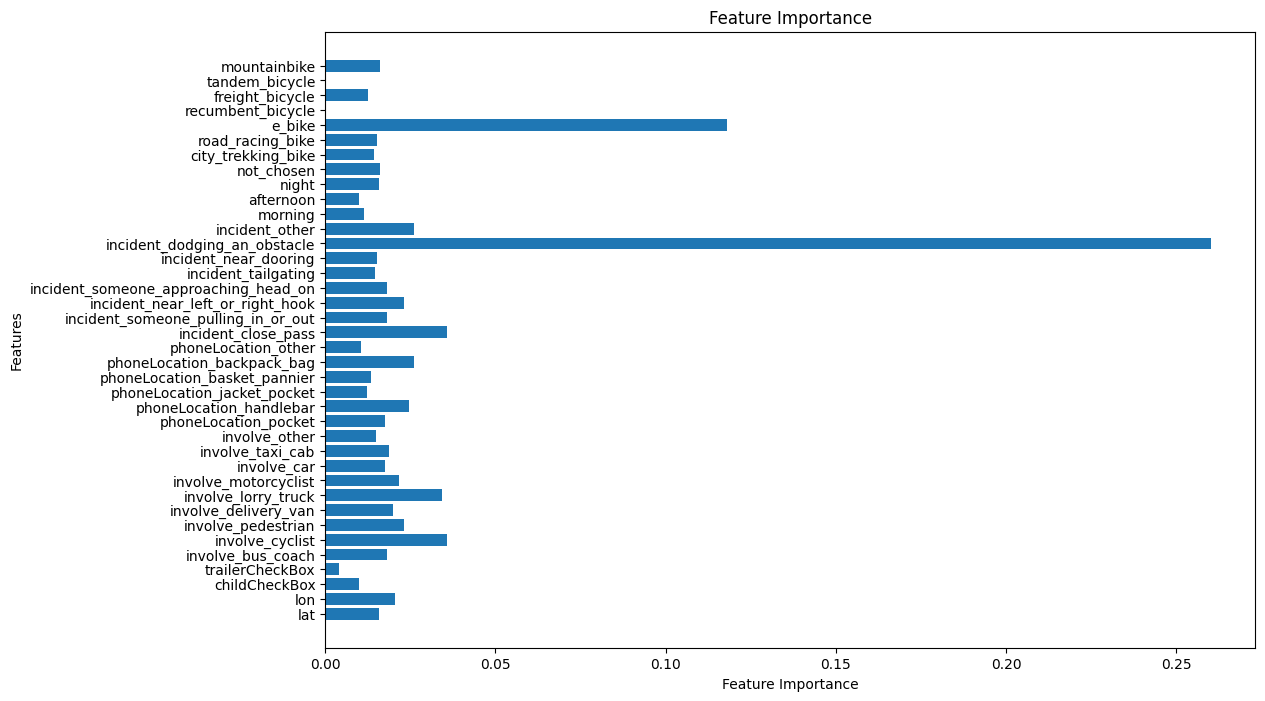

In [22]:
# plot feature importance 
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 8))
plt.barh(features.columns, model.feature_importances_)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()
